In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('NSL_KDD_bayesian_enc_training_set.csv')
test = pd.read_csv('NSL_KDD_bayesian_enc_testing_set.csv')

In [2]:
x1 = train.iloc[:,1:41]
y1 = train['label']
print(x1)
print(y1)

        src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0             491          0     0               0       0    0   
1             146          0     0               0       0    0   
2               0          0     0               0       0    0   
3             232       8153     0               0       0    0   
4             199        420     0               0       0    0   
...           ...        ...   ...             ...     ...  ...   
125968          0          0     0               0       0    0   
125969        105        145     0               0       0    0   
125970       2231        384     0               0       0    0   
125971          0          0     0               0       0    0   
125972        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  root_shell  ...  \
0                       0          0                0           0  ...   
1                       0          0           

In [3]:
x2 = test.iloc[:,1:41]
y2 = test['label']
print(x2)
print(y2)

       src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0          0     0               0       0    0   
1              0          0     0               0       0    0   
2          12983          0     0               0       0    0   
3             20          0     0               0       0    0   
4              0         15     0               0       0    0   
...          ...        ...   ...             ...     ...  ...   
22539        794        333     0               0       0    0   
22540        317        938     0               0       0    0   
22541      54540       8314     0               0       0    2   
22542         42         42     0               0       0    0   
22543          0          0     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  root_shell  ...  \
0                      0          0                0           0  ...   
1                      0          0                0         

In [4]:
train["label"].value_counts()

0    67343
1    58630
Name: label, dtype: int64

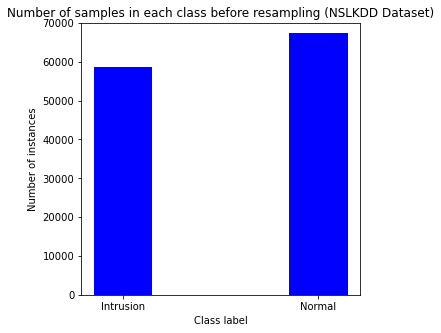

In [5]:
from matplotlib import pyplot as plt
data1 = {'Intrusion':58630, 'Normal':67343}
Class_label = list(data1.keys())
Number_of_instances = list(data1.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 70000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class before resampling (NSLKDD Dataset)")
plt.show()

In [6]:
# RESAMPLING

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_sample(x1, y1) 

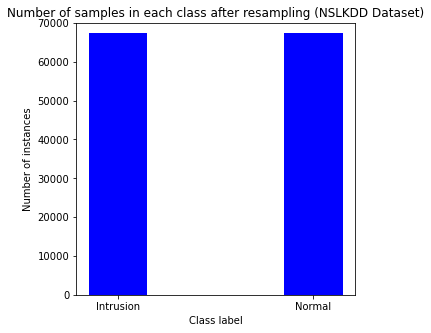

In [30]:
data2 = {'Intrusion':67343, 'Normal':67343}
Class_label = list(data2.keys())
Number_of_instances = list(data2.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 70000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class after resampling (NSLKDD Dataset)")
plt.show()

In [8]:
# NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
model.fit(x1)
x1 = model.transform(x1)
x2 = model.transform(x2)

In [9]:
# 1. XGBOOST FEATURE SELECTION

from xgboost import XGBClassifier
import xgboost as xgb
params = {
             'learning_rate': 0.1,
        'n_estimators':381,
        'max_depth':5,
        'min_child_weight':8,
        'gamma':0.0,
        'reg_alpha' : 0.005,
        'subsample':0.9,
        'colsample_bytree':0.6,
        'objective': 'binary:logistic',
        'nthread':4,
        'scale_pos_weight':1,
        'seed':27
         }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x1, y1)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=381, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0.005, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [10]:
y_pred=xgb_clf.predict(x2)
print(y_pred)

[1 1 0 ... 1 0 1]


In [11]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Accuracy in XGBoost classifier model before FS = ', metrics.accuracy_score(y2, y_pred)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y2, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y2, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y2, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y2, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y2, y_pred, average='macro'))

Accuracy in XGBoost classifier model before FS =  79.45794889992904
Confusion Matrix = [[9442  269]
 [4362 8471]]
Recall = 0.7945794889992903
Precision = 0.8463624262928319
Classification Report =
               precision    recall  f1-score   support

           0       0.68      0.97      0.80      9711
           1       0.97      0.66      0.79     12833

    accuracy                           0.79     22544
   macro avg       0.83      0.82      0.79     22544
weighted avg       0.85      0.79      0.79     22544

F1 Score =  0.7941976970744857


In [12]:
abc1 = list(train.columns[0:4])
abc1

['duration', 'src_bytes', 'dst_bytes', 'land']

In [13]:
abc2 = list(train.columns[5:41])
abc2

['urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type',
 'service',
 'flag']

In [14]:
abc3 = abc1 + abc2
abc3

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type',
 'service',
 'flag']

In [15]:
xgb_clf.get_booster().feature_names = abc3

ValueError: The number of FixedLocator locations (33), usually from a call to set_ticks, does not match the number of ticklabels (40).

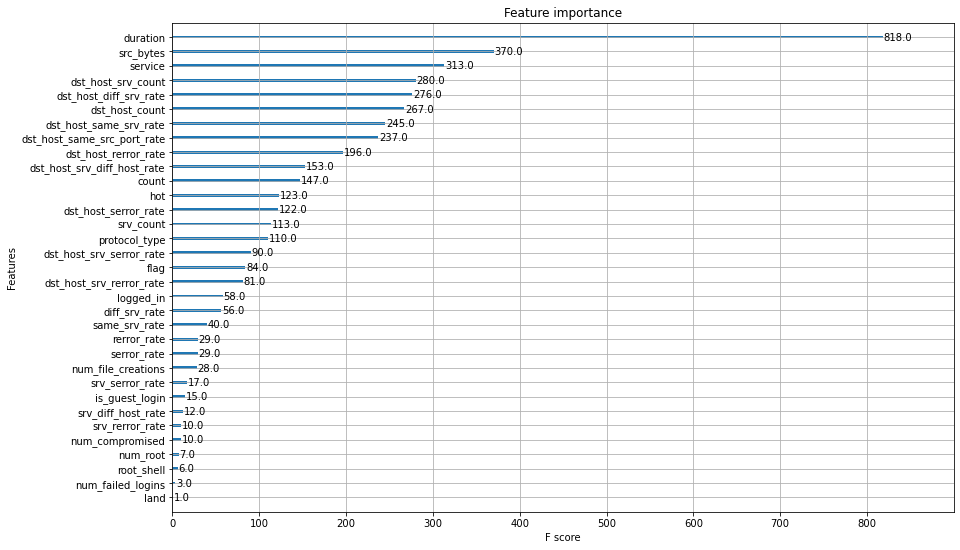

In [16]:
from IPython.core.pylabtools import figsize
figsize(14, 9)
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_clf).set_yticklabels(abc3)


In [17]:
pd.Series(xgb_clf.get_booster().get_fscore()).sort_values(ascending=False)

duration                       818.0
src_bytes                      370.0
service                        313.0
dst_host_srv_count             280.0
dst_host_diff_srv_rate         276.0
dst_host_count                 267.0
dst_host_same_srv_rate         245.0
dst_host_same_src_port_rate    237.0
dst_host_rerror_rate           196.0
dst_host_srv_diff_host_rate    153.0
count                          147.0
hot                            123.0
dst_host_serror_rate           122.0
srv_count                      113.0
protocol_type                  110.0
dst_host_srv_serror_rate        90.0
flag                            84.0
dst_host_srv_rerror_rate        81.0
logged_in                       58.0
diff_srv_rate                   56.0
same_srv_rate                   40.0
rerror_rate                     29.0
serror_rate                     29.0
num_file_creations              28.0
srv_serror_rate                 17.0
is_guest_login                  15.0
srv_diff_host_rate              12.0
n

In [18]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(xgb_clf.feature_importances_)
print(thresholds)

[0.         0.         0.         0.         0.         0.
 0.         0.00197093 0.00255039 0.00257206 0.00293953 0.00313528
 0.00384515 0.00398264 0.00528151 0.00549247 0.00565206 0.00577297
 0.00591819 0.00651832 0.00664822 0.00893929 0.01113858 0.01172895
 0.01251084 0.01391875 0.01617652 0.02265299 0.02325589 0.02379557
 0.02835167 0.0339696  0.0369223  0.03920159 0.04344051 0.0631948
 0.06501263 0.08771387 0.18096845 0.21482748]


In [19]:
n_min = 40
acc_max = 0
thresholds = sort(xgb_clf.feature_importances_)
obj_thresh = thresholds[0]
for thresh in thresholds:
    selection = SelectFromModel(xgb_clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x1)
    selection_model = XGBClassifier(**params)
    selection_model.fit(select_X_train, y1)
    select_X_test = selection.transform(x2)
    predictions = selection_model.predict(select_X_test)
    accuracy = metrics.accuracy_score(y2, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (obj_thresh, select_X_train.shape[1], accuracy*100.0))
    if(select_X_train.shape[1] < n_min) and (accuracy > acc_max):
        n_min = select_X_train.shape[1]
        acc_max = accuracy
        obj_thresh = thresh

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=40, Accuracy: 79.46%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=40, Accuracy: 79.46%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=40, Accuracy: 79.46%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=40, Accuracy: 79.46%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=40, Accuracy: 79.46%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=40, Accuracy: 79.46%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=40, Accuracy: 79.46%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.000, n=33, Accuracy: 80.14%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.002, n=32, Accuracy: 79.14%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.002, n=31, Accuracy: 79.58%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.002, n=30, Accuracy: 79.47%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.002, n=29, Accuracy: 80.23%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=28, Accuracy: 80.12%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=27, Accuracy: 79.50%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.003, n=26, Accuracy: 80.31%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.005, n=25, Accuracy: 79.71%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.005, n=24, Accuracy: 80.47%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=23, Accuracy: 80.58%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=22, Accuracy: 80.22%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=21, Accuracy: 80.11%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=20, Accuracy: 80.38%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=19, Accuracy: 79.57%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=18, Accuracy: 79.64%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=17, Accuracy: 79.49%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=16, Accuracy: 79.21%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=15, Accuracy: 79.76%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=14, Accuracy: 80.38%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.006, n=13, Accuracy: 80.92%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.023, n=12, Accuracy: 80.97%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.023, n=11, Accuracy: 80.57%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.023, n=10, Accuracy: 79.46%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.023, n=9, Accuracy: 78.81%
[20:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.023, n=8, Accuracy: 79.31%
[20:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.023, n=7, Accuracy: 81.27%
[20:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.039, n=6, Accuracy: 79.31%
[20:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.039, n=5, Accuracy: 81.23%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.039, n=4, Accuracy: 82.10%
[20:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.065, n=3, Accuracy: 81.32%
[20:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Thresh=0.065, n=2, Accuracy: 81.34%


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.065, n=1, Accuracy: 75.51%


In [20]:
selection = SelectFromModel(xgb_clf, threshold=obj_thresh, prefit=True)
select_X_train = selection.transform(x1)
selection_model = XGBClassifier(**params)
selection_model.fit(select_X_train, y1)
select_X_test = selection.transform(x2)
predictions = selection_model.predict(select_X_test)
accuracy = metrics.accuracy_score(y2, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (obj_thresh, select_X_train.shape[1], accuracy*100.0))

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Thresh=0.065, n=4, Accuracy: 82.10%


In [21]:
select_X_train

array([[3.55806412e-07, 0.00000000e+00, 1.00000000e+00, 3.12151472e-01],
       [1.05799870e-07, 0.00000000e+00, 8.00000000e-02, 4.86434481e-01],
       [0.00000000e+00, 0.00000000e+00, 5.00000000e-02, 9.31122545e-01],
       ...,
       [3.76821455e-07, 0.00000000e+00, 1.00000000e+00, 9.37842779e-01],
       [0.00000000e+00, 0.00000000e+00, 2.99814938e-01, 7.45252931e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e-02, 9.57257348e-01]])

In [22]:
select_X_test

array([[0.00000000e+00, 0.00000000e+00, 4.00000000e-02, 9.31122545e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e-02, 9.31122545e-01],
       [9.40821721e-06, 0.00000000e+00, 1.00000000e+00, 3.12151472e-01],
       ...,
       [3.95227734e-05, 1.33707715e-04, 1.00000000e+00, 7.19843954e-02],
       [3.04355791e-08, 0.00000000e+00, 1.00000000e+00, 1.10697394e-03],
       [0.00000000e+00, 0.00000000e+00, 2.50000000e-01, 1.00000000e+00]])

In [23]:
select_X_train.shape

(134686, 4)

In [24]:
select_X_test.shape

(22544, 4)

In [31]:
recon_feat_train = pd.DataFrame(select_X_train, columns =['XGB_0', 'XGB_1','XGB_2','XGB_3'])
recon_feat_train

,XGB_0,XGB_1,XGB_2,XGB_3
0,3.558064e-07,0.0,1.000000,0.312151
1,1.057999e-07,0.0,0.080000,0.486434
2,0.000000e+00,0.0,0.050000,0.931123
3,1.681203e-07,0.0,1.000000,0.071984
4,1.442067e-07,0.0,1.000000,0.071984
...,...,...,...,...
134681,0.000000e+00,0.0,0.070000,0.931123
134682,0.000000e+00,0.0,0.050000,0.447813
134683,3.768215e-07,0.0,1.000000,0.937843
134684,0.000000e+00,0.0,0.299815,0.074525


In [32]:
recon_feat_test = pd.DataFrame(select_X_test, columns =['XGB_0', 'XGB_1','XGB_2','XGB_3'])
recon_feat_test

,XGB_0,XGB_1,XGB_2,XGB_3
0,0.000000e+00,0.000000,0.04,0.931123
1,0.000000e+00,0.000000,0.01,0.931123
2,9.408217e-06,0.000000,1.00,0.312151
3,1.449313e-08,0.000000,1.00,0.892120
4,0.000000e+00,0.000000,1.00,0.758482
...,...,...,...,...
22539,5.753774e-07,0.000000,1.00,0.072754
22540,2.297162e-07,0.000000,1.00,0.071984
22541,3.952277e-05,0.000134,1.00,0.071984
22542,3.043558e-08,0.000000,1.00,0.001107


In [33]:
x1_recon = recon_feat_train.iloc[:,:]
print(x1_recon)
x2_recon = recon_feat_test.iloc[:,:]
print(x2_recon)

               XGB_0  XGB_1     XGB_2     XGB_3
0       3.558064e-07    0.0  1.000000  0.312151
1       1.057999e-07    0.0  0.080000  0.486434
2       0.000000e+00    0.0  0.050000  0.931123
3       1.681203e-07    0.0  1.000000  0.071984
4       1.442067e-07    0.0  1.000000  0.071984
...              ...    ...       ...       ...
134681  0.000000e+00    0.0  0.070000  0.931123
134682  0.000000e+00    0.0  0.050000  0.447813
134683  3.768215e-07    0.0  1.000000  0.937843
134684  0.000000e+00    0.0  0.299815  0.074525
134685  0.000000e+00    0.0  0.010000  0.957257

[134686 rows x 4 columns]
              XGB_0     XGB_1  XGB_2     XGB_3
0      0.000000e+00  0.000000   0.04  0.931123
1      0.000000e+00  0.000000   0.01  0.931123
2      9.408217e-06  0.000000   1.00  0.312151
3      1.449313e-08  0.000000   1.00  0.892120
4      0.000000e+00  0.000000   1.00  0.758482
...             ...       ...    ...       ...
22539  5.753774e-07  0.000000   1.00  0.072754
22540  2.297162e-07  

In [25]:
# 2. XGBoost CLASSIFIER MODEL

# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, predictions)
print('ROC AUC: %f' % auc)

ROC AUC: 0.838241


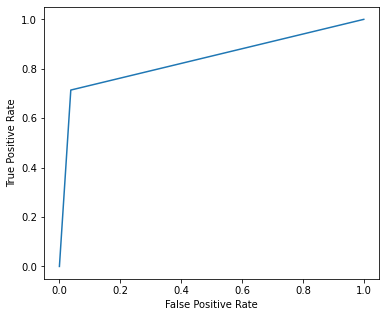

In [34]:
from matplotlib import pyplot as plt
from sklearn import metrics
figsize(6, 5)
fpr, tpr, _ = metrics.roc_curve(y2,  predictions)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in XGBoost classifier model = ', metrics.accuracy_score(y2, predictions)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y2, predictions, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y2, predictions, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y2, predictions, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y2, predictions, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y2, predictions, average='macro'))

Accuracy in XGBoost classifier model =  82.10166784953869
Confusion Matrix = [[9348  363]
 [3672 9161]]
Recall = 0.8210166784953868
Precision = 0.8568181990989979
Classification Report =
               precision    recall  f1-score   support

           0       0.72      0.96      0.82      9711
           1       0.96      0.71      0.82     12833

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544

F1 Score =  0.8210043626647618


<AxesSubplot:>

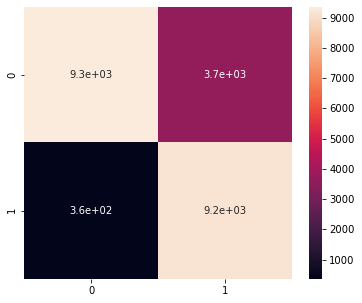

In [35]:
figsize(6, 5)
cm_xgb = metrics.confusion_matrix(predictions, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_xgb, annot=True)

<AxesSubplot:>

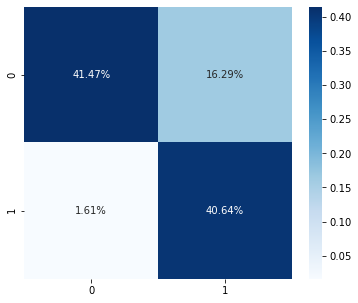

In [36]:
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot=True, 
            fmt='.2%', cmap='Blues')

In [40]:
# 3. DNN CLASSIFIER MODEL

from tensorflow import keras
model_DNN=keras.models.Sequential()
model_DNN.add(keras.layers.Dense(units=4, activation = "relu",input_shape = select_X_train.shape[1:]))
model_DNN.add(keras.layers.Dense(units=8,activation = "relu"))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=16,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=32,activation = "relu" ))
model_DNN.add(keras.layers.Dense(units=64,activation = "relu" ))
model_DNN.add(keras.layers.Dense(units=2, activation = "sigmoid"))
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2

In [41]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_DNN.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaDNNNet_new.h5",monitor='val_loss')
history = model_DNN.fit(select_X_train, y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [select_X_test, y2])
testloss,testaccuracy=model_DNN.evaluate(select_X_test,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
8418/8418 [==============================] - 39s 4ms/step - loss: 0.2067 - accuracy: 0.9383 - val_loss: 0.4726 - val_accuracy: 0.7764
Epoch 2/50
8418/8418 [==============================] - 32s 4ms/step - loss: 0.1959 - accuracy: 0.9407 - val_loss: 0.5205 - val_accuracy: 0.7765
Epoch 3/50
8418/8418 [==============================] - 31s 4ms/step - loss: 0.1891 - accuracy: 0.9440 - val_loss: 0.5376 - val_accuracy: 0.7773
Epoch 4/50
8418/8418 [==============================] - 33s 4ms/step - loss: 0.1882 - accuracy: 0.9438 - val_loss: 0.5612 - val_accuracy: 0.7772
Epoch 5/50
8418/8418 [==============================] - 32s 4ms/step - loss: 0.1951 - accuracy: 0.9425 - val_loss: 0.5805 - val_accuracy: 0.8364
Epoch 6/50
8418/8418 [==============================] - 31s 4ms/step - loss: 0.1981 - accuracy: 0.9399 - val_loss: 0.5239 - val_accuracy: 0.7772
Epoch 7/50
8418/8418 [==============================] - 33s 4ms/step - loss: 0.1928 - accuracy: 0.9438 - val_loss: 0.5503 - val_ac

In [42]:
y_pred_DNN = model_DNN.predict(select_X_test)
print(y_pred_DNN)
y_pred_class_DNN=np.argmax(y_pred_DNN,axis=1)
print(y_pred_class_DNN)
print("Test Loss =",testloss)
print("Test Accuracy =",testaccuracy)

[[0.05139625 0.93440366]
 [0.03437564 0.95492864]
 [0.79155624 0.28220722]
 ...
 [0.8686323  0.24734652]
 [0.9722246  0.16090205]
 [0.24131909 0.73100376]]
[1 1 0 ... 0 0 1]
Test Loss = 0.5611533522605896
Test Accuracy = 0.7771912813186646


In [43]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_class_DNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.792056


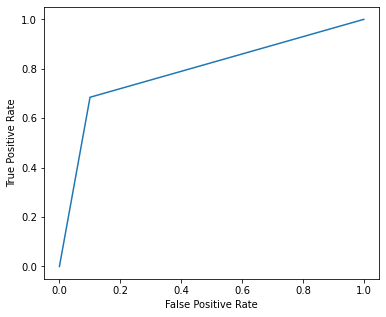

In [44]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_pred_class_DNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_DNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_DNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_DNN, y2, average='macro'))

Accuracy in DNN classifier model =  77.71912704045423
Confusion Matrix = [[8734 4046]
 [ 977 8787]]
Recall = 0.7771912704045423
Precision = 0.8064155666937596
Classification Report =
               precision    recall  f1-score   support

           0       0.90      0.68      0.78     12780
           1       0.68      0.90      0.78      9764

    accuracy                           0.78     22544
   macro avg       0.79      0.79      0.78     22544
weighted avg       0.81      0.78      0.78     22544

F1 Score =  0.7771900389329713


<AxesSubplot:>

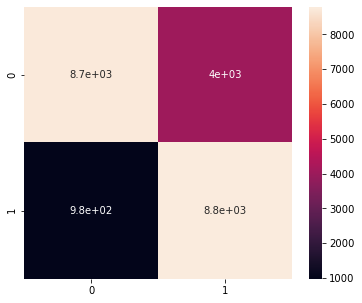

In [46]:
cm_DNN = metrics.confusion_matrix(y_pred_class_DNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_DNN, annot=True)

<AxesSubplot:>

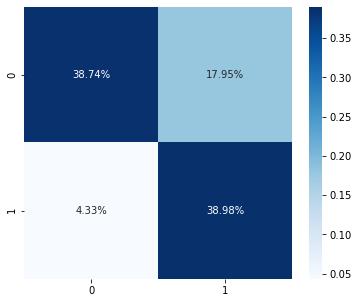

In [47]:
sns.heatmap(cm_DNN/np.sum(cm_DNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [48]:
# 4. CNN CLASSIFIER MODEL

select_X_train_CNN = np.reshape(select_X_train, (select_X_train.shape[0],select_X_train.shape[1],1))
select_X_test_CNN = np.reshape(select_X_test, (select_X_test.shape[0],select_X_test.shape[1],1))

In [49]:
from tensorflow import keras
from tensorflow.keras.layers import Input
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
convnet=keras.models.Sequential()
convnet.add(keras.layers.Convolution1D(4,3,activation="relu",input_shape=(4,1)))
convnet.add(keras.layers.BatchNormalization())
convnet.add(keras.layers.MaxPooling1D(1,1))
convnet.add(keras.layers.Flatten())
convnet.add(keras.layers.Dense(8,activation="relu"))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Dense(2,activation="softmax"))
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 4)              16        
                                                                 
 batch_normalization (BatchN  (None, 2, 4)             16        
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 4)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                

In [50]:
opt = keras.optimizers.Adam(learning_rate=0.01)
convnet.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaConvNet_new.h5",monitor='val_loss')
history = convnet.fit(select_X_train_CNN,y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [select_X_test_CNN, y2])
testloss,testaccuracy=convnet.evaluate(select_X_test_CNN,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
8418/8418 [==============================] - 37s 4ms/step - loss: 0.2048 - accuracy: 0.9361 - val_loss: 0.5903 - val_accuracy: 0.8359
Epoch 2/50
8418/8418 [==============================] - 33s 4ms/step - loss: 0.2007 - accuracy: 0.9372 - val_loss: 0.4677 - val_accuracy: 0.8359
Epoch 3/50
8418/8418 [==============================] - 34s 4ms/step - loss: 0.1992 - accuracy: 0.9383 - val_loss: 0.4878 - val_accuracy: 0.8356
Epoch 4/50
8418/8418 [==============================] - 36s 4ms/step - loss: 0.1968 - accuracy: 0.9385 - val_loss: 0.4717 - val_accuracy: 0.8358
Epoch 5/50
8418/8418 [==============================] - 35s 4ms/step - loss: 0.1959 - accuracy: 0.9382 - val_loss: 0.5633 - val_accuracy: 0.8353
Epoch 6/50
8418/8418 [==============================] - 23s 3ms/step - loss: 0.1961 - accuracy: 0.9381 - val_loss: 0.5523 - val_accuracy: 0.8358
Epoch 7/50
8418/8418 [==============================] - 23s 3ms/step - loss: 0.1966 - accuracy: 0.9389 - val_loss: 0.5561 - val_ac

In [51]:
y_pred_CNN = convnet.predict(select_X_test_CNN)
print(y_pred_CNN)
y_pred_class_CNN=np.argmax(y_pred_CNN,axis=1)
print(y_pred_class_CNN)

[[4.0454400e-04 9.9959546e-01]
 [1.4836749e-04 9.9985158e-01]
 [8.1149536e-01 1.8850458e-01]
 ...
 [9.6894485e-01 3.1055136e-02]
 [9.8216450e-01 1.7835563e-02]
 [2.8027805e-02 9.7197223e-01]]
[1 1 0 ... 0 0 1]


In [52]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_class_CNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.840501


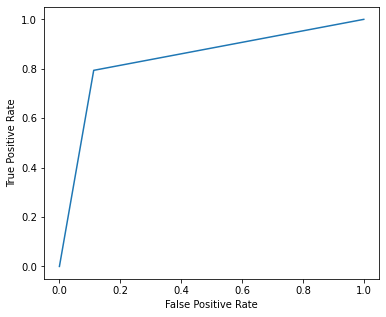

In [53]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_pred_class_CNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_CNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_CNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_CNN, y2, average='macro'))

Accuracy in CNN classifier model =  83.4013484740951
Confusion Matrix = [[ 8617  2648]
 [ 1094 10185]]
Recall = 0.834013484740951
Precision = 0.8404715231834253
Classification Report =
               precision    recall  f1-score   support

           0       0.89      0.76      0.82     11265
           1       0.79      0.90      0.84     11279

    accuracy                           0.83     22544
   macro avg       0.84      0.83      0.83     22544
weighted avg       0.84      0.83      0.83     22544

F1 Score =  0.8332066046221118


<AxesSubplot:>

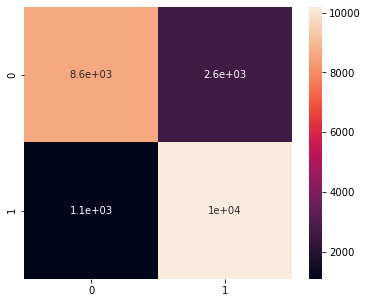

In [55]:
cm_CNN = metrics.confusion_matrix(y_pred_class_CNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_CNN, annot=True)

<AxesSubplot:>

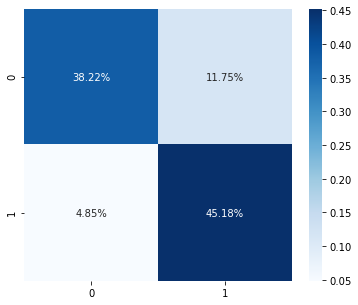

In [56]:
sns.heatmap(cm_CNN/np.sum(cm_CNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [57]:
# 5. TCN CLASSIFIER MODEL

print(select_X_train.shape[0])
print(select_X_test.shape[0])

134686
22544


In [58]:
print(select_X_train.shape, y1.shape, select_X_test.shape, y2.shape)
select_X_train_TCN = np.reshape(select_X_train, (select_X_train.shape[0],select_X_train.shape[1],1))
select_X_test_TCN = np.reshape(select_X_test, (select_X_test.shape[0],select_X_test.shape[1],1))
print(select_X_train_TCN.shape, y1.shape, select_X_test_TCN.shape, y2.shape)

(134686, 4) (134686,) (22544, 4) (22544,)
(134686, 4, 1) (134686,) (22544, 4, 1) (22544,)


In [59]:
from tensorflow.keras.utils import to_categorical
num_classes = 2
y1_TCN = to_categorical(y1, num_classes)
y2_TCN = to_categorical(y2, num_classes)
print(select_X_train_TCN.shape, y1.shape, select_X_test_TCN.shape, y2.shape)

(134686, 4, 1) (134686,) (22544, 4, 1) (22544,)


In [60]:
y1_TCN = np.expand_dims(y1_TCN, axis=2)
y2_TCN = np.expand_dims(y2_TCN, axis=2)
print(select_X_train_TCN.shape, y1.shape, select_X_test_TCN.shape, y2.shape)

(134686, 4, 1) (134686,) (22544, 4, 1) (22544,)


In [61]:
!pip install keras-tcn

In [62]:
import numpy as np
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tcn import compiled_tcn

In [63]:
model_TCN = compiled_tcn(return_sequences = False,num_feat = 1, num_classes = 2, nb_filters = 64,kernel_size=6,
                    dilations=[1,2,4,8,16,32,64],nb_stacks=1, opt='adam',lr=0.002,activation = 'relu',kernel_initializer = 
                    'he_normal',use_batch_norm=True,use_layer_norm = False,use_weight_norm = False,
                     max_len=select_X_train_TCN[0:1].shape[1],use_skip_connections=True) 

x.shape= (None, 64)
model.x = (None, 4, 1)
model.y = (None, 2)


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [64]:
print(select_X_train_TCN[0:1].shape[1])

4


In [65]:
print(f'x_train.shape = {select_X_train_TCN.shape}')
print(f'y_train.shape = {y1_TCN.shape}')
print(f'x_test.shape = {select_X_test_TCN.shape}')
print(f'y_test.shape = {y2_TCN.shape}')

x_train.shape = (134686, 4, 1)
y_train.shape = (134686, 2, 1)
x_test.shape = (22544, 4, 1)
y_test.shape = (22544, 2, 1)


In [66]:
model_TCN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 1)]            0         
                                                                 
 tcn (TCN)                   (None, 64)                324480    
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 324,610
Trainable params: 322,818
Non-trainable params: 1,792
_________________________________________________________________


In [67]:
y1_TCN = y1_TCN.squeeze().argmax(axis=1)
y2_TCN = y2_TCN.squeeze().argmax(axis=1)

In [68]:
history = model_TCN.fit(select_X_train_TCN, y1_TCN, epochs = 10, validation_data = [select_X_test_TCN, y2_TCN], 
                    workers=4, use_multiprocessing=True)

Epoch 1/10
4209/4209 [==============================] - 657s 148ms/step - loss: 0.1776 - accuracy: 0.9460 - val_loss: 0.5804 - val_accuracy: 0.7759
Epoch 2/10
4209/4209 [==============================] - 619s 147ms/step - loss: 0.1600 - accuracy: 0.9513 - val_loss: 0.5476 - val_accuracy: 0.7750
Epoch 3/10
4209/4209 [==============================] - 618s 147ms/step - loss: 0.1565 - accuracy: 0.9517 - val_loss: 0.5962 - val_accuracy: 0.7745
Epoch 4/10
4209/4209 [==============================] - 617s 147ms/step - loss: 0.1540 - accuracy: 0.9517 - val_loss: 0.5279 - val_accuracy: 0.7760
Epoch 5/10
4209/4209 [==============================] - 632s 150ms/step - loss: 0.1520 - accuracy: 0.9521 - val_loss: 0.5970 - val_accuracy: 0.7626
Epoch 6/10
4209/4209 [==============================] - 631s 150ms/step - loss: 0.1506 - accuracy: 0.9525 - val_loss: 0.5602 - val_accuracy: 0.7385
Epoch 7/10
4209/4209 [==============================] - 638s 152ms/step - loss: 0.1499 - accuracy: 0.9530 - val_

In [69]:
result = model_TCN.evaluate(select_X_test_TCN, y2_TCN)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")

705/705 [==============================] - 26s 36ms/step - loss: 0.5613 - accuracy: 0.76780s - loss: 0.5608 - ac
Accuracy : 76.78 %
Loss : 56.13 %


In [70]:
y_pred_TCN = model_TCN.predict(select_X_test_TCN, verbose=0)
print(np.argmax(y_pred_TCN, axis=1))
y_pred_class_TCN=np.argmax(y_pred_TCN,axis=1)
print(y_pred_class_TCN)

[1 1 0 ... 0 0 1]
[1 1 0 ... 0 0 1]


In [71]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_TCN, y_pred_class_TCN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.783696


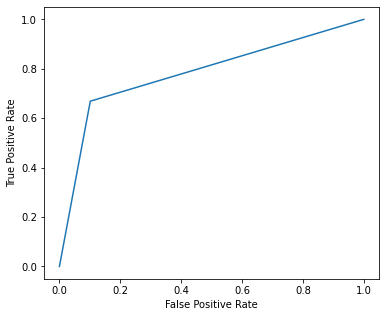

In [72]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_TCN, y2_TCN, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_TCN, y2_TCN, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_TCN, y2_TCN, average='macro'))

Accuracy in TCN classifier model =  76.77874378992193
Confusion Matrix = [[8726 4250]
 [ 985 8583]]
Recall = 0.7677874378992193
Precision = 0.8010610764610482
Classification Report =
               precision    recall  f1-score   support

           0       0.90      0.67      0.77     12976
           1       0.67      0.90      0.77      9568

    accuracy                           0.77     22544
   macro avg       0.78      0.78      0.77     22544
weighted avg       0.80      0.77      0.77     22544

F1 Score =  0.7677780943192258


<AxesSubplot:>

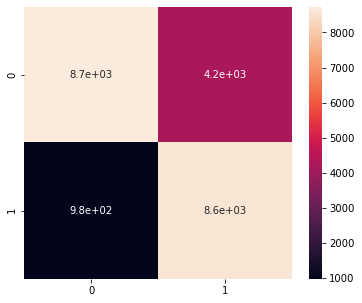

In [74]:
cm_TCN = metrics.confusion_matrix(y_pred_class_TCN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TCN, annot=True)

<AxesSubplot:>

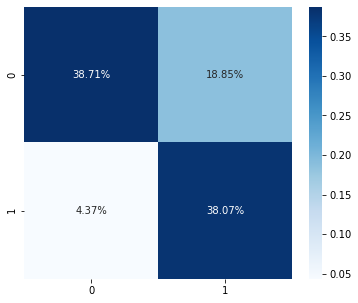

In [75]:
sns.heatmap(cm_TCN/np.sum(cm_TCN), annot=True, 
            fmt='.2%', cmap='Blues')

In [76]:
# 6. TabNet CLASSIFIER MODEL

print("X train shape: ", select_X_train.shape)
print("X test shape: ", select_X_test.shape)
print("Y train shape: ", y1.shape)
print("Y test shape: ", y2.shape)

X train shape:  (134686, 4)
X test shape:  (22544, 4)
Y train shape:  (134686,)
Y test shape:  (22544,)


In [77]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [78]:
# define the model
model_TabNet = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=5e-2),
                       scheduler_params={"step_size":10,"gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax')

Device used : cpu


In [79]:
# fit the model 
model_TabNet.fit(select_X_train,y1, eval_set=[(select_X_train, y1), (select_X_test, y2)],eval_name=['train', 'valid'],
                   eval_metric=['auc','accuracy'],max_epochs=20 , patience=50, batch_size=256, virtual_batch_size=128, 
                   num_workers=0, weights=1,drop_last=False)    

epoch 0  | loss: 0.15148 | train_auc: 0.95562 | train_accuracy: 0.94248 | valid_auc: 0.82029 | valid_accuracy: 0.77147 |  0:00:46s
epoch 1  | loss: 0.1397  | train_auc: 0.96293 | train_accuracy: 0.62523 | valid_auc: 0.76751 | valid_accuracy: 0.51229 |  0:01:32s
epoch 2  | loss: 0.13175 | train_auc: 0.76386 | train_accuracy: 0.55356 | valid_auc: 0.52584 | valid_accuracy: 0.47392 |  0:02:21s
epoch 3  | loss: 0.13162 | train_auc: 0.96285 | train_accuracy: 0.95752 | valid_auc: 0.77136 | valid_accuracy: 0.80762 |  0:03:08s
epoch 4  | loss: 0.12624 | train_auc: 0.98906 | train_accuracy: 0.95969 | valid_auc: 0.92797 | valid_accuracy: 0.7716  |  0:03:57s
epoch 5  | loss: 0.12304 | train_auc: 0.98233 | train_accuracy: 0.94443 | valid_auc: 0.91518 | valid_accuracy: 0.7248  |  0:04:42s
epoch 6  | loss: 0.12521 | train_auc: 0.98306 | train_accuracy: 0.94278 | valid_auc: 0.92172 | valid_accuracy: 0.76238 |  0:05:27s
epoch 7  | loss: 0.15216 | train_auc: 0.93957 | train_accuracy: 0.82304 | valid_auc

Text(0, 0.5, 'Feature index')

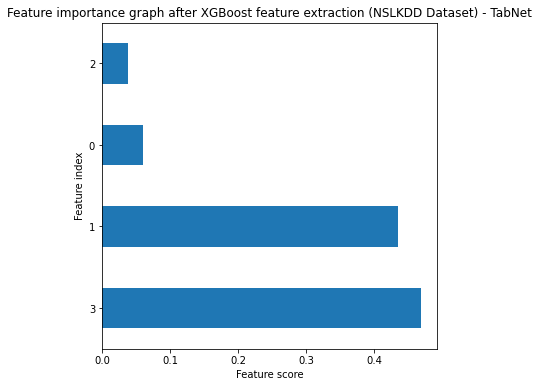

In [90]:
# find and plot feature importance 
from IPython.core.pylabtools import figsize
figsize(6, 6)
model_TabNet.feature_importances_
feat_importances = pd.Series(model_TabNet.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importance graph after XGBoost feature extraction (NSLKDD Dataset) - TabNet")
plt.xlabel("Feature score")
plt.ylabel("Feature index")

In [81]:
y_pred_TabNet = model_TabNet.predict(select_X_test)
print(y_pred_TabNet)

[1 1 1 ... 1 0 1]


In [82]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_TabNet)
print('ROC AUC: %f' % auc)

ROC AUC: 0.879009


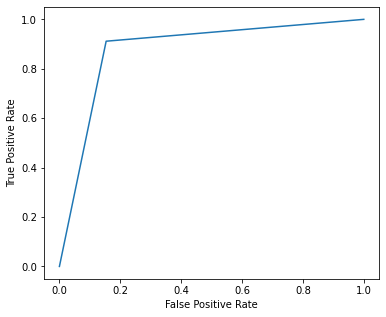

In [91]:
figsize(6, 5)
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
test_acc = accuracy_score(y_pred_TabNet, y2)
print("Accuracy in TabNet classifier model:",test_acc*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_TabNet, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_TabNet, y2, average='macro'))

Accuracy in TabNet classifier model: 88.35166784953869
Confusion Matrix = [[ 8220  1135]
 [ 1491 11698]]
Recall = 0.8835166784953868
Precision = 0.8845445901246668
Classification Report =
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      9355
           1       0.91      0.89      0.90     13189

    accuracy                           0.88     22544
   macro avg       0.88      0.88      0.88     22544
weighted avg       0.88      0.88      0.88     22544

F1 Score =  0.8806766503757123


<AxesSubplot:>

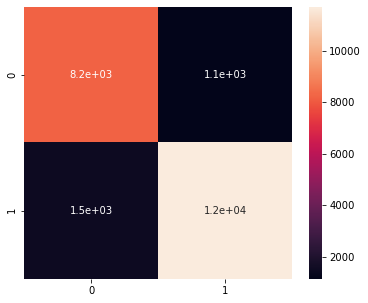

In [92]:
figsize(6, 5)
cm_TabNet = metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TabNet, annot=True)

<AxesSubplot:>

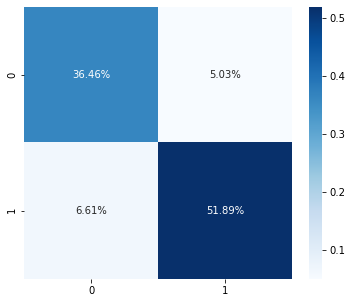

In [93]:
sns.heatmap(cm_TabNet/np.sum(cm_TabNet), annot=True, 
            fmt='.2%', cmap='Blues')

In [87]:
print("Thresh=%.3f, Number of selected features=%d" % (obj_thresh, select_X_train.shape[1]))
print('Accuracy result of all models:')
print('Accuracy in XGBoost classifier model = ', metrics.accuracy_score(y2, predictions)*100)
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_pred_class_DNN, y2)*100)
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_pred_class_CNN, y2)*100)
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Accuracy in TabNet classifier model:",test_acc*100)

Thresh=0.065, Number of selected features=4
Accuracy result of all models:
Accuracy in XGBoost classifier model =  82.10166784953869
Accuracy in DNN classifier model =  77.71912704045423
Accuracy in CNN classifier model =  83.4013484740951
Accuracy in TCN classifier model =  76.77874378992193
Accuracy in TabNet classifier model: 88.35166784953869


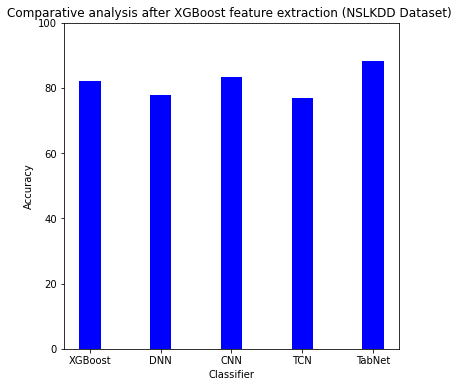

In [94]:
data = {'XGBoost':82.10, 'DNN':77.72, 'CNN':83.40,
        'TCN':76.78, 'TabNet':88.35}
Classifier_model = list(data.keys())
Classifier_accuracy = list(data.values())
  
fig = plt.figure(figsize = (6, 6))
 
# creating the bar plot
plt.bar(Classifier_model, Classifier_accuracy, color ='blue',
        width = 0.3)
plt.ylim(0, 100)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparative analysis after XGBoost feature extraction (NSLKDD Dataset) ")
plt.show()

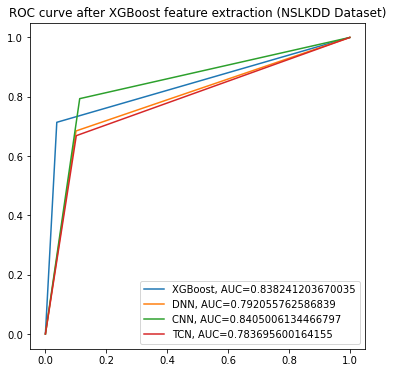

In [88]:
from IPython.core.pylabtools import figsize
figsize(6, 6)
#set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  predictions)
auc = roc_auc_score(y2, predictions)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
auc = roc_auc_score(y2, y_pred_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
auc = roc_auc_score(y2, y_pred_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

#add legend
plt.title("ROC curve after XGBoost feature extraction (NSLKDD Dataset)")
plt.legend()

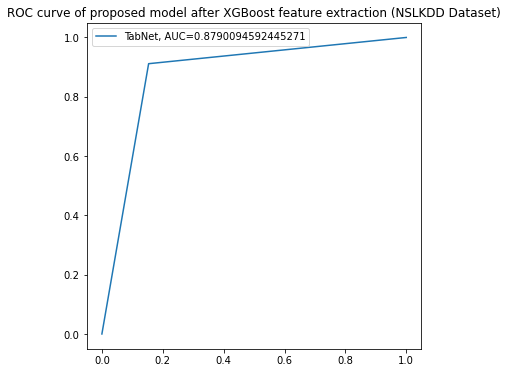

In [89]:
from IPython.core.pylabtools import figsize
figsize(6, 6)
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))
#add legend
plt.title("ROC curve of proposed model after XGBoost feature extraction (NSLKDD Dataset)")
plt.legend()

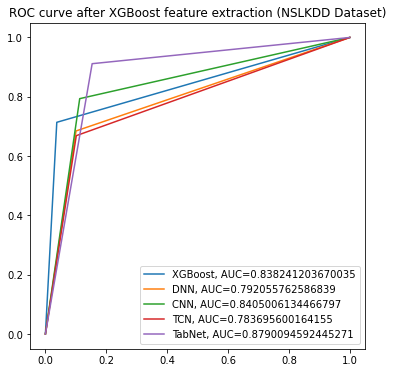

In [97]:
from IPython.core.pylabtools import figsize
figsize(6, 6)
#set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  predictions)
auc = roc_auc_score(y2, predictions)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_DNN)
auc = roc_auc_score(y2, y_pred_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_CNN)
auc = roc_auc_score(y2, y_pred_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))

#add legend
plt.title("ROC curve after XGBoost feature extraction (NSLKDD Dataset)")
plt.legend()

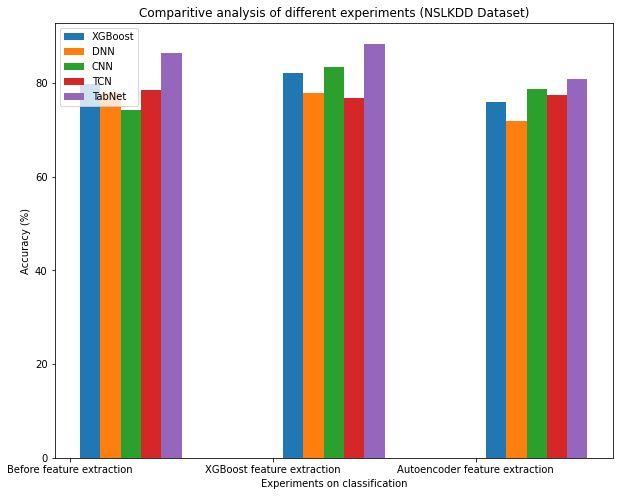

In [96]:
from IPython.core.pylabtools import figsize
figsize(10, 8)
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Before feature extraction','XGBoost feature extraction','Autoencoder feature extraction']
xvals = [79.79,82.10,75.94]
yvals = [77.85,77.72,71.77]
zvals = [74.16,83.40,78.67]
avals = [78.42,76.77,77.44]
bvals = [86.39,88.35,80.84]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.1, label = 'XGBoost')
plt.bar(x_axis +0.1*2, yvals, width=0.1, label = 'DNN')
plt.bar(x_axis +0.1*3, zvals, width=0.1, label = 'CNN')
plt.bar(x_axis +0.1*4, avals, width=0.1, label = 'TCN')
plt.bar(x_axis +0.1*5, bvals, width=0.1, label = 'TabNet')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification")
plt.title("Comparitive analysis of different experiments (NSLKDD Dataset)")
plt.legend()
plt.show()